In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv('/content/smsspamcollection (1).tsv', sep='\t')

In [ ]:
df .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.3+ KB


In [ ]:
df1=df.drop(columns=['length','punct'])

In [ ]:
df1.sample(5)

,label,message
2354,spam,Please CALL 08712402902 immediately as there i...
1991,ham,HI DARLIN IVE JUST GOT BACK AND I HAD A REALLY...
2443,ham,I donno if they are scorable
1554,ham,Ok how you dear. Did you call chechi
4748,ham,"When you just put in the + sign, choose my num..."


In [ ]:
from sklearn .preprocessing import LabelEncoder
encoder=LabelEncoder()

In [ ]:
encoder.fit_transform(df1['label'])

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
df1['label']=encoder.fit_transform(df1['label'])

In [ ]:
df1.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df1.isnull().sum()

,0
label,0
message,0


In [ ]:
df1.duplicated().sum()

np.int64(403)

In [ ]:
df1.drop_duplicates(inplace=True)

In [ ]:
df1.duplicated().sum()

np.int64(0)

In [ ]:
df1.shape

(5169, 2)

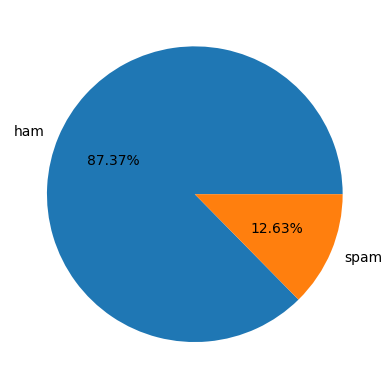

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df1['label'].value_counts(),labels=['ham','spam'],autopct='%1.2f%%')
plt.show()

In [ ]:
import nltk

In [ ]:
df1['message'].apply(len)

,message
0,111
1,29
2,155
3,49
4,61
...,...
5567,160
5568,36
5569,57
5570,125


In [ ]:
df1['num_characters']=df1['message'].apply(len)

In [ ]:
df1.head()

,label,message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
df1['num_words'] = df1['message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df1.head()

,label,message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
df1['message'].apply(lambda x:nltk.sent_tokenize(x))

,message
0,"[Go until jurong point, crazy.., Available onl..."
1,"[Ok lar..., Joking wif u oni...]"
2,[Free entry in 2 a wkly comp to win FA Cup fin...
3,[U dun say so early hor... U c already then sa...
4,"[Nah I don't think he goes to usf, he lives ar..."
...,...
5567,[This is the 2nd time we have tried 2 contact ...
5568,[Will ü b going to esplanade fr home?]
5569,"[Pity, * was in mood for that., So...any other..."
5570,[The guy did some bitching but I acted like i'...


In [ ]:
df1['num_sentences'] = df1['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df1.head()

,label,message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df1[['num_words','num_characters','num_sentences']].describe()

,num_words,num_characters,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,18.593538,79.344941,1.974076
std,13.402779,58.439256,1.458967
min,1.000000,2.000000,1.000000
25%,9.000000,36.000000,1.000000
50%,15.000000,61.000000,1.000000
75%,26.000000,119.000000,2.000000
max,220.000000,910.000000,38.000000


In [ ]:
df1[df1['label']==0][['num_words','num_sentences']].describe()

,num_words,num_sentences
count,4516.000000,4516.000000
mean,17.267715,1.827724
std,13.588065,1.394338
min,1.000000,1.000000
25%,8.000000,1.000000
50%,13.000000,1.000000
75%,22.000000,2.000000
max,220.000000,38.000000


In [ ]:
df1[df1['label']==1][['num_words','num_sentences']].describe()

,num_words,num_sentences
count,653.000000,653.000000
mean,27.762634,2.986217
std,6.993008,1.494815
min,2.000000,1.000000
25%,25.000000,2.000000
50%,29.000000,3.000000
75%,32.000000,4.000000
max,46.000000,9.000000


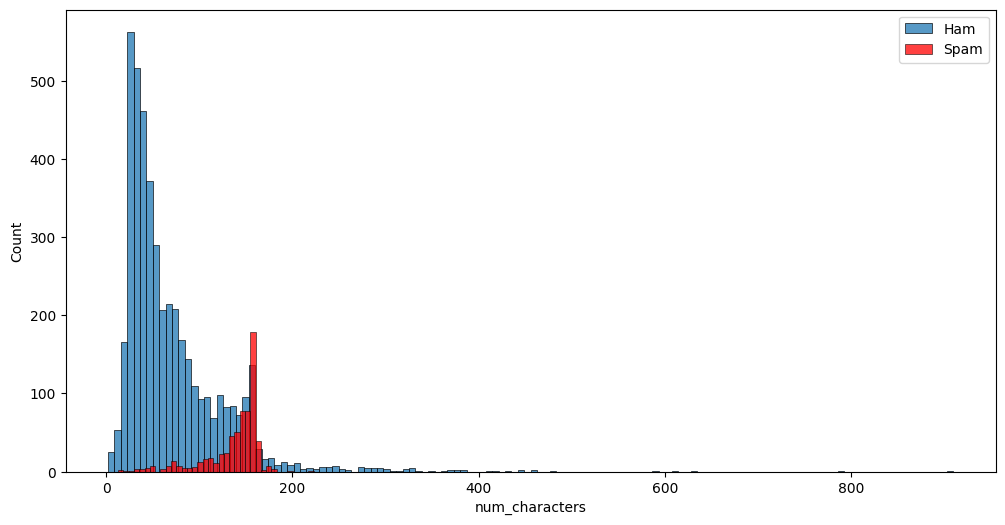

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df1[df1['label']==0]['num_characters'],label='Ham')
sns.histplot(df1[df1['label']==1]['num_characters'], color='red',label='Spam')
plt.legend()
plt.show()

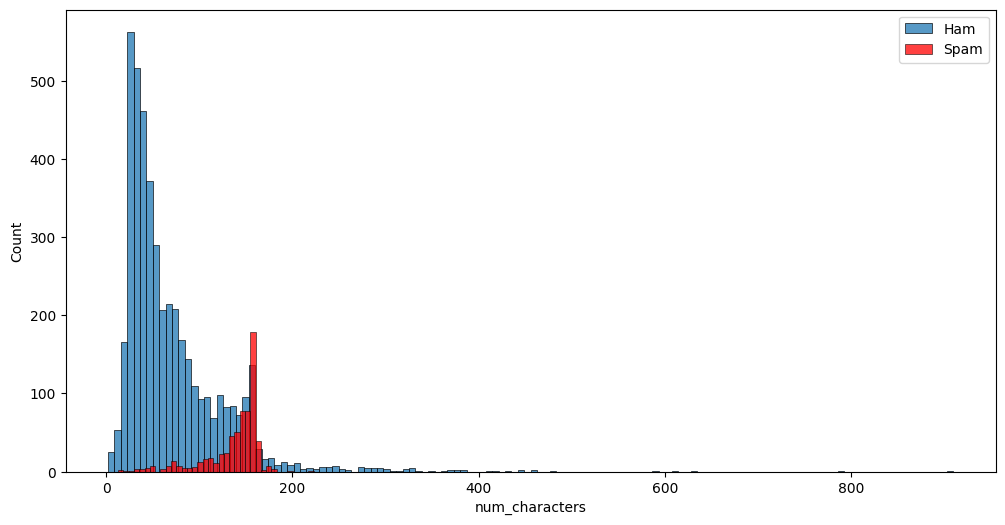

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df1[df1['label']==0]['num_characters'],label='Ham')
sns.histplot(df1[df1['label']==1]['num_characters'], color='red',label='Spam')
plt.legend()
plt.show()

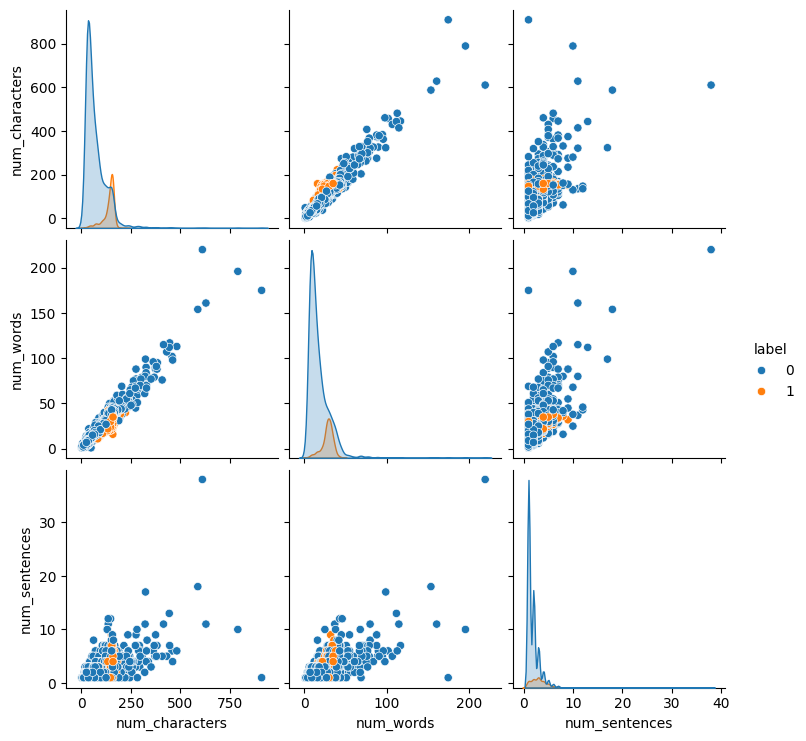

In [ ]:
sns.pairplot(df1,hue='label')

In [ ]:
df2=df1.drop(columns=['message'])
df2.head()

,label,num_characters,num_words,num_sentences
0,0,111,24,2
1,0,29,8,2
2,1,155,37,2
3,0,49,13,1
4,0,61,15,1


In [ ]:
df2.corr()

,label,num_characters,num_words,num_sentences
label,1.000000,0.379777,0.260168,0.263826
num_characters,0.379777,1.000000,0.966002,0.622566
num_words,0.260168,0.966002,1.000000,0.679142
num_sentences,0.263826,0.622566,0.679142,1.000000


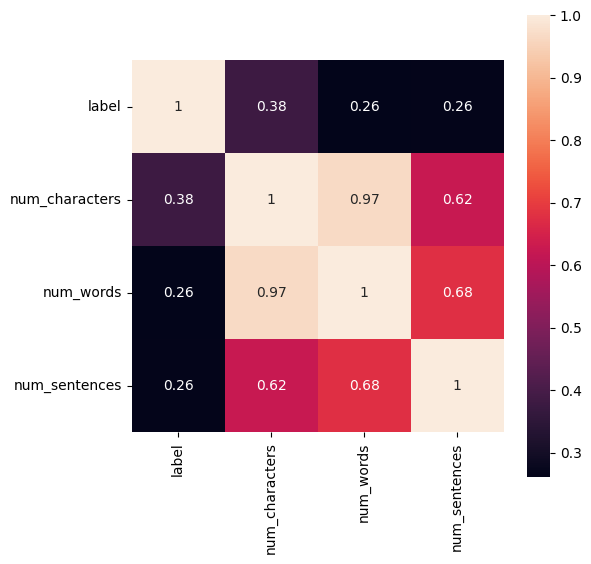

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(df2.corr(),annot=True,square=True)
plt.show()

Data **proccessing**